<a href="https://colab.research.google.com/github/dibyarupd/MNIST_digit_recognizer_0/blob/main/MNIST_digit_recognizer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIGIT RECOGNIZER (MNIST DATASET)

This digit recognizer project is done by me (Dibyarup Deb) to showcase my skills while working with PyTorch (which is a Python framework mostly used for deep learning and neural network purposes). I have a passion in AI (Artificial Intelligence), so I try to explore this field as much as possible. My learning is still in progress (as it should be), the stuff that I am learning while doing this project is *neural networks*.
<br><br>
![pytorch_logo](https://drive.google.com/uc?export=view&id=1w25_CW62B8DXqnvh6E1Cg7upevHdrKIj)
<br><br>
* PyTorch tutorial (from where I mostly learnt about PyTorch): (Daniel Bourke) https://www.youtube.com/watch?v=Z_ikDlimN6A&t=59149s

There is also a book version of the above course: https://www.learnpytorch.io/

* Some other resources for PyTorch tutorial: (Aladdin Persson) https://youtube.com/playlist?list=PLhhyoLH6IjfxeoooqP9rhU3HJIAVAJ3Vz&si=ta3QrXnMCnoQVwDw

* A walkthrough of the same project: (NeuralNine) https://youtu.be/vBlO87ZAiiw?si=TgVVL1zIzu5XKZt1

The whole project is done using this notebook as coded below.

## 0. Importing necessary dependencies

* `torch`: This is the basic PyTorch package used to manage tensors and do mathematical operations upon them.

What is a tensor? - https://www.kdnuggets.com/2018/05/wtf-tensor.html

* `torch.nn`: This package is the building block for creating neural network in PyTorch.

* `torchvision`: This package consists of popular datasets, model architectures, and common image transformations for computer vision.

* Rest of the packages / modules are explained along the way.

In [1]:
# importing dependencies

# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

# check versions
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.2.1+cu121
torchvision version: 0.17.1+cu121


## 1. Getting data

The data which we will be using in this project is the popular MNIST dataset. This MNIST data can be found as `torchvision.datasets.MNIST()`.

MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems. The training dataset was taken from American census bureau employees and the testing dataset was taken from American high school students. It contains 60000 training images and 10000 testing images. The black and white images were normalized to fit into 28x28 pixels. To know more about MNIST data refer to - https://en.wikipedia.org/wiki/MNIST_database
<br><br>
![MNIST_example](https://drive.google.com/uc?export=view&id=13K-cldsS01ICUn4aPmsL6MR7q6WUbblh)
<br><br>
`torchvision.datasets` module contains many other datasets as well. To look at those datasets refer to - https://pytorch.org/vision/main/datasets.html

In [2]:
# load training data
train_data = datasets.MNIST(
    root = 'data', # the location where the data will be loaded
    train = True, # whether to load the training data or not?
    download = True, # whether to download the data or not?
    transform = ToTensor(), # transforms the data to tensor
    target_transform = None # whether to transform the labels or not?
)

#load testing data
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 9912422/9912422 [00:00<00:00, 219468698.17it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 84063632.08it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 179600888.06it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14665534.08it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### 1.1 Input shape of the data

Check if the input shape of the data is fine or if any data cleaning is needed or not.

In [3]:
# check out the first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
# what is the shape of the image?
image.shape

torch.Size([1, 28, 28])

The image has only one color channel as it is a grey scale image. The order is of our current image tensor is known as (CHW) or color channel first. Refer to the below image from Daniel Bourke's PyTorch video for clarity.
<br><br>
![MNIST_example](https://drive.google.com/uc?export=view&id=19DU8z1mQ2_pzvD6XTs4ULe0TF4fqXHc-)
<br><br>

In [5]:
# how many samples are there?
print(f"Length of training data: {len(train_data)}")
print(f"Length of testing data: {len(test_data)}")

Length of training data: 60000
Length of testing data: 10000


In [6]:
# what are the classes present in the data?
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
# class names with the indexes as a dictionary
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

### 1.2 Visualizing our data

Using matplotlib lets visualize some of our training samples.

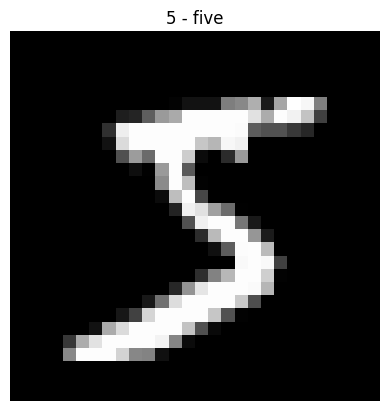

In [8]:
# visualizing our first image data
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

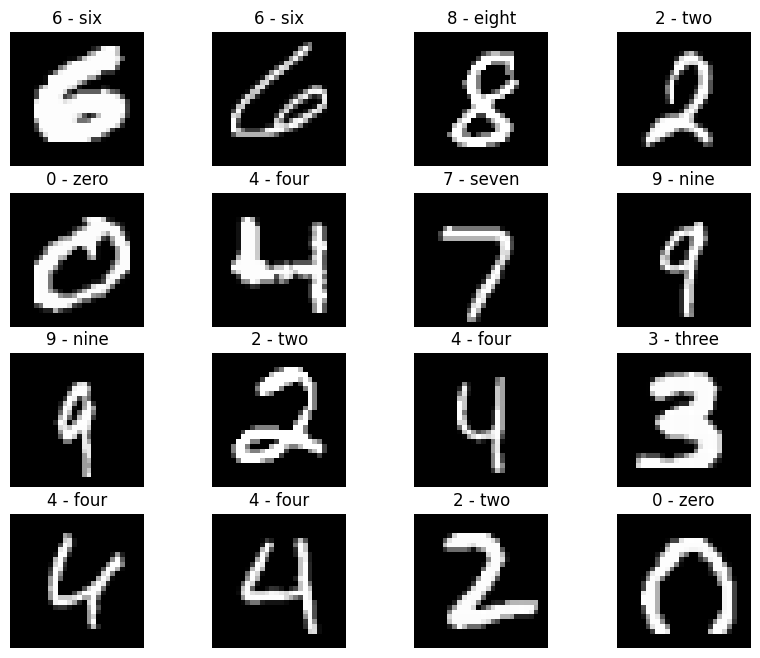

In [9]:
# visualizing random 16 samples from the training data
torch.manual_seed(42)
fig = plt.figure(figsize = (10, 8))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)
plt.show()

## 2. Prepare DataLoader

Our training data consist of 60000 data units. So we would like to break this large data chunk into Python iterable of smaller chunks. This can be done with `torch.utils.data.DataLoader`.  

Why would we do this?

* It is not computationally efficient for the computer to look at all of the data points in one hit. So we break it down to smaller chunks of images in one time. This size of batches or mini-batches can be set using the hyperparameter `batch_size`. 32 is a common number to start with.

* It also gives the neural network more chances to see at the data per epoch.

In [10]:
# turn the large chunk of data into smaller mini-batches
from torch.utils.data import DataLoader

# set the batch_size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [11]:
# checking the number of batches

print(f"Length of train_dataloader: {len(train_dataloader)}, batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)}, batches of {BATCH_SIZE}")

Length of train_dataloader: 1875, batches of 32
Length of test_dataloader: 313, batches of 32


Let's look at a few samples from the batch from the `train_dataloader`.

In [12]:
# extract a batch from the train_dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [38]:
train_labels_batch[0]

tensor(1)

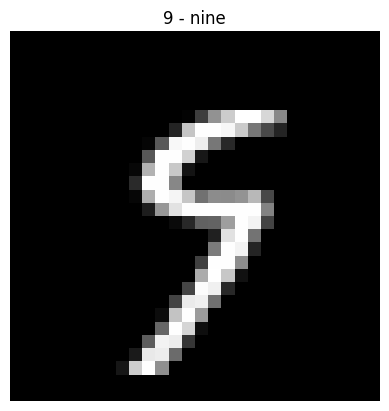

In [13]:
# visualize a sample from the training batch

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

## 3. Build a baseline model

A baseline model is one of the simplest models that can be imagined. This model can be regarded as a base model and can be upgraded to fit the data well and generate better models.

Since our image data is a 3 dimensional data, we need to turn our data into a single long vector since our baseline model likes to input the data as a single long vector.

We will turn the image data into a single long vector by using the `nn.flatten()` layer. It compresses the dimension of the tensors into a single vector.

In [59]:
# using the nn.flatten layer

flatten_layer = nn.Flatten()

X = train_features_batch[0]
output = flatten_layer(X)

# checking the shape of the tensor before flattening and after flattening

print(f"Shape before flattening: {X.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


Let's now build our baseline model. Our baseline will consist of two `nn.Linear()` layers.

In [60]:
# create the baseline model with two nn.Linear() layers

class MNISTModel0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

Let's create an instance of the model.

In [61]:
# create an instance of the model
model_0 = MNISTModel0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_names)
)

# keep the model in cpu
model_0.to("cpu")

MNISTModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss and optimizer

Let's setup a loss function and optimizer.

We will use a cross entropy loss as our loss function and SGD(Stochastic Gradient Descent) as our optimizer.

In [62]:
# setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

###3.2 Creating a training loop and training a model on batches of data

Let's create a training and testing loop to test and evaluate our model.

In [63]:
# let's create an accuracy function to begin with

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return correct / len(y_pred) * 100

In [64]:
# create a training loop

torch.manual_seed(42)

epochs = 3

for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-----")
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)

    # 2. calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. zero-grad the optimizer
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    if batch%400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)}")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X)

      # print(test_pred, "aaaaaa")

      # 2. calculate loss
      test_loss += loss_fn(test_pred, y)

      # 3. calculate accuracy
      test_acc += accuracy_fn(y, test_pred.argmax(dim = 1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Accuracy: {test_acc:5f}%\n\n")


Epoch: 0
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.85968 | Test loss: 0.44048 | Accuracy: 87.849441%


Epoch: 1
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.40218 | Test loss: 0.34732 | Accuracy: 89.796326%


Epoch: 2
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss: 0.34700 | Test loss: 0.31727 | Accuracy: 91.124201%


